In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("iris.csv")
data
data.head()

data1 = pd.read_csv("iris_test.csv")
data1
data1.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.tail()

data1.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
data.info()

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             99 non-null     int64  
 1   SepalLengthCm  99 non-null     float64
 2   SepalWidthCm   99 non-null     float64
 3   PetalLengthCm  99 non-null     float64
 4   PetalWidthCm   99 non-null     float64
 5   Species        99 non-null     object 
dtypes: float64(4), int64(1)

In [5]:
data.describe()

data1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.000000,5.468687,3.096970,2.849495,0.779798
std,28.722813,0.644545,0.477548,1.450501,0.566763
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,25.500000,5.000000,2.800000,1.500000,0.200000
50%,50.000000,5.400000,3.100000,1.900000,0.600000
75%,74.500000,5.900000,3.400000,4.350000,1.300000
max,99.000000,7.000000,4.400000,5.100000,1.800000


In [6]:
data.isnull().sum()

data1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data1["Species"].value_counts()

data1["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    49
Name: Species, dtype: int64

In [14]:
data.nunique()



Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [40]:
l_e = preprocessing.LabelEncoder()
data['Species'] = l_e.fit_transform(data["Species"])
data

data1['Species'] = l_e.fit_transform(data1["Species"])
data1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
94,95,5.6,2.7,4.2,1.3,1
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1


<AxesSubplot:xlabel='Count', ylabel='Species'>

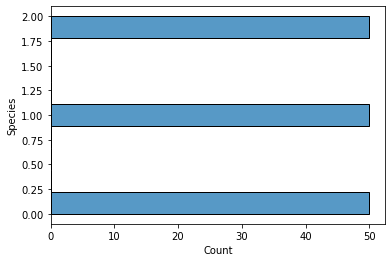

In [29]:
sns.histplot(data=data,y="Species")


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [31]:
x = data.drop("Species", axis=1)
y = data["Species"]

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2)

In [33]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(120, 5)
(30, 5)
(120,)
(30,)


In [41]:
lr = LogisticRegression()

In [35]:
lr.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = lr.predict(x_val)

In [37]:
y_pred

array([2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 2, 0, 1, 1], dtype=int64)

In [38]:
#This also AuC

lr.score(x_val, y_val)

1.0

In [39]:
confusion_matrix(y_pred,y_val)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)